In [1]:
from functools import partial
import numpy as np
from math import sqrt, log, pi, exp
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

In [2]:
FACTOR_LOGNORMAL = 1.0 / ( sqrt(2.0*pi))

def lognormal(r, ksi=1.0, lambda_=1.0):
    
    par1 = FACTOR_LOGNORMAL/(ksi*r)
    par2 = -0.5*((log(r) - lambda_)/ksi)**2     
    
    return  par1 * exp(par2)

def sigma(mu, delta):
    return mu * delta

def ksi(delta):
    return sqrt(log(1.0+delta**2))

def lambda_(mu, ksi):
    return  log(mu) - 0.5 * ksi**2


def paramenters_lognormal(mu, delta):
    k = ksi(delta)    
    return sigma(mu, delta), k, lambda_(mu, k)

In [3]:
def tipoI(x, alpha, u):
    par1 = exp(-alpha * (x - u))
    return alpha*exp(-par1)*par1


def alpha(sig):
    return (pi/sqrt(6))*(1.0/sig)

def u(mu, alpha):
    return mu - 0.5772/alpha

# U1 - Modulo de Elasticidade do Cimento: LogNormal

In [4]:
mu1, delta1 = 1.19, 0.1

sigma1, ksi1, lambda1 =  paramenters_lognormal(mu1, delta1)

print(f'sigma = {sigma1:.3f} ksi = {ksi1:.5f} lambda = {lambda1:.5f}')

sigma = 0.119 ksi = 0.09975 lambda = 0.16898


In [5]:
x = np.arange(0.01, mu1+10*sigma1, 0.01)
p = np.arange(0.0, 1.0, 0.001)

# 
# scale = exp μ, where μ is the mean of the log of the variate
# s = the standard deviation of the log of the variate

f1 = partial(lognorm.pdf, s=ksi1, scale=exp(lambda1))
F1 = partial(lognorm.cdf, s=ksi1, scale=exp(lambda1))
IF1 = partial(lognorm.ppf, s=ksi1, scale=exp(lambda1))

pdf = f1(x)
cdf = F1(x)
icdf = IF1(p)

In [6]:
def graph_pdf(x, pdf, mu, xlabel, ylabel):
    
    plt.figure(figsize=(8, 4))

    plt.plot(x, pdf, label='dist')
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.axvline(x = mu, color = 'r', label = 'Media')

    plt.legend()

    plt.show()
    

def graph_cdf(x, cdf, mu, xlabel, ylabel):

    plt.figure(figsize=(8, 4))
    
    plt.plot(x, cdf, label='dist')
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.axvline(x = mu, color = 'r', label = 'Media')

    plt.legend()

    plt.show()
    
def graph_icdf(x, icdf, mu, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    plt.plot(p, icdf, label='Função inversa Acumulada')
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.axhline(y = mu, color = 'r', label = 'Media')

    plt.legend()

    plt.show()

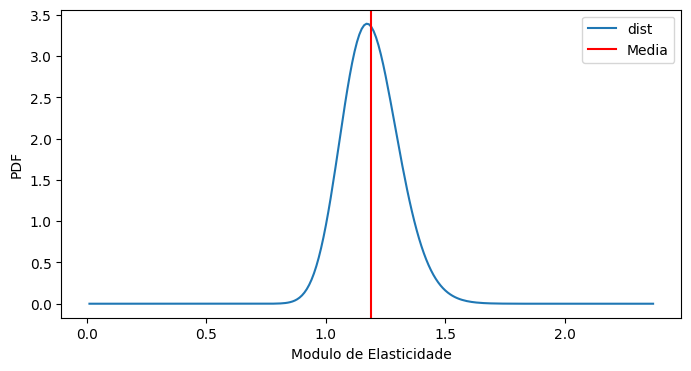

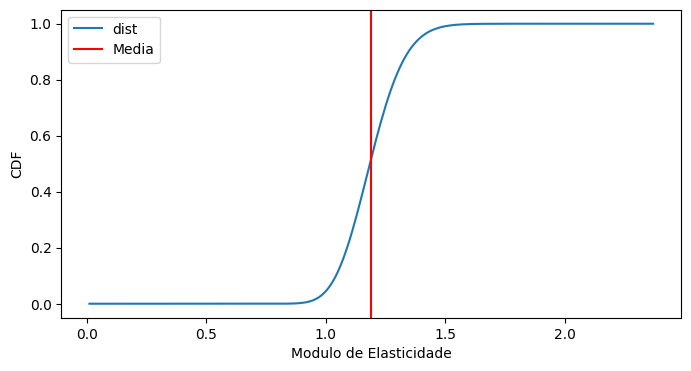

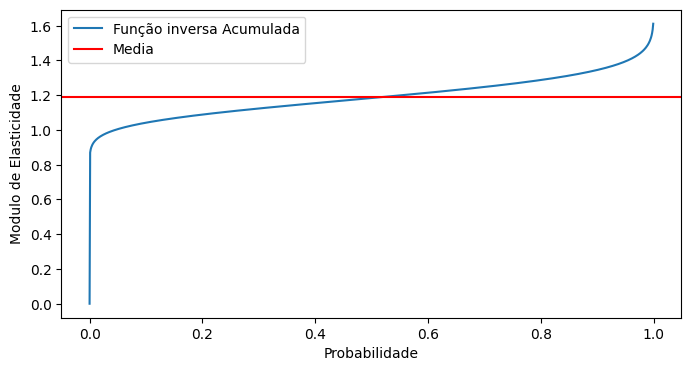

In [7]:
graph_pdf(x, pdf, mu1, 'PDF', 'Modulo de Elasticidade')
graph_cdf(x, cdf, mu1, 'CDF', 'Modulo de Elasticidade', )
graph_icdf(x, icdf, mu1, 'Modulo de Elasticidade',  'Probabilidade')

# U2 - Coeficiente de Poisson do Cimento: LogNormal

In [8]:
mu2, delta2 = 1.8, 0.1

sigma2, ksi2, lambda2 =  paramenters_lognormal(mu2, delta2)

print(f'sigma = {sigma2:.3f} ksi = {ksi2:.5f} lambda = {lambda2:.5f}')

sigma = 0.180 ksi = 0.09975 lambda = 0.58281


In [9]:
x = np.arange(0.01, mu2+10*sigma2, 0.01)
p = np.arange(0.0, 1.0, 0.001)

# 
# scale = exp μ, where μ is the mean of the log of the variate
# s = the standard deviation of the log of the variate

f2 = partial(lognorm.pdf, s=ksi2, scale=exp(lambda2))
F2 = partial(lognorm.cdf, s=ksi2, scale=exp(lambda2))
IF2 = partial(lognorm.ppf, s=ksi2, scale=exp(lambda2))

pdf = f2(x)
cdf = F2(x)
icdf = IF2(p)

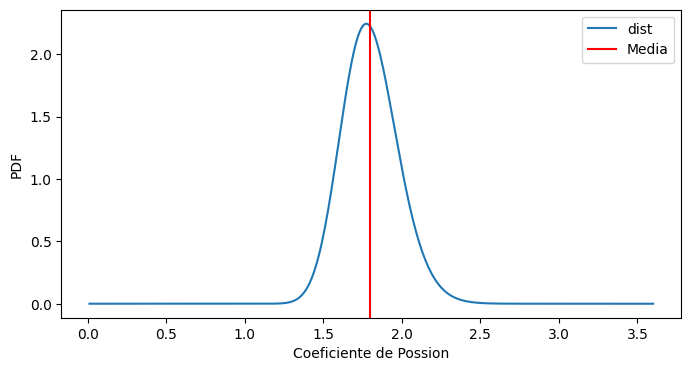

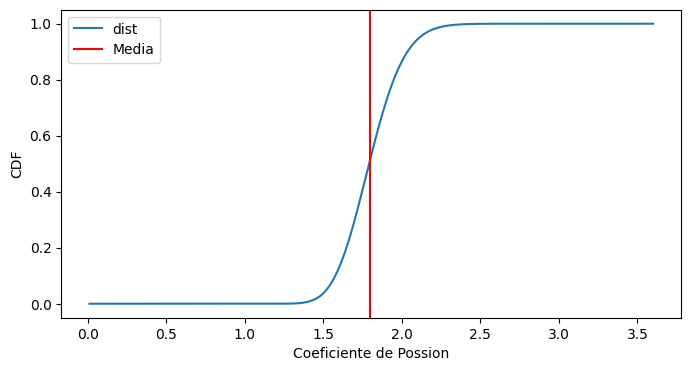

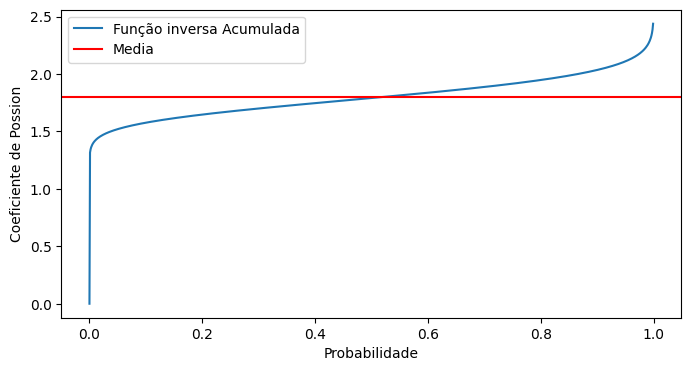

In [10]:
graph_pdf(x, pdf, mu2, 'PDF', 'Coeficiente de Possion')
graph_cdf(x, cdf, mu2, 'CDF', 'Coeficiente de Possion')
graph_icdf(x, icdf, mu2, 'Coeficiente de Possion', 'Probabilidade')

# U3 - Coesão: Normal

In [11]:
mu3, delta3 = 1.817, 0.1

sigma3 = sigma(mu3, delta3)

print(f'sigma = {sigma3:.3f}')

sigma = 0.182


In [12]:
f3 = partial(norm.pdf, loc=mu3, scale=sigma3)
F3 = partial(norm.cdf, loc=mu3, scale=sigma3)
IF3 = partial(norm.ppf, loc=mu3, scale=sigma3)

x = np.arange(0.01, mu3+10*sigma3, 0.01)
p = np.arange(0.0, 1.0, 0.001)

pdf = f3(x)
cdf = F3(x)
icdf = IF3(p)

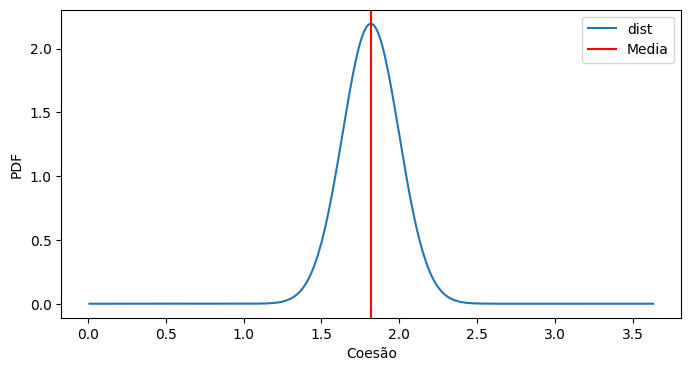

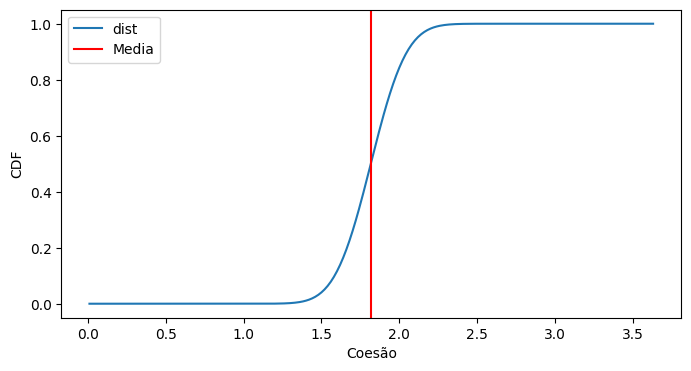

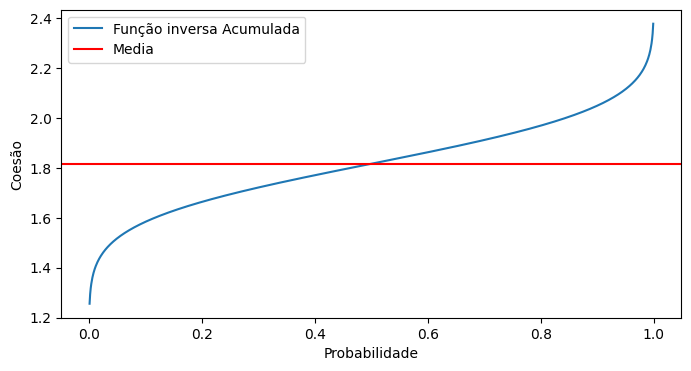

In [13]:
graph_pdf(x, pdf, mu3, 'PDF', 'Coesão')
graph_cdf(x, cdf, mu3, 'CDF', 'Coesão')
graph_icdf(x, icdf, mu3, 'Coesão', 'Probabilidade')

# U4 - Pressão interna: Tipo I

In [14]:
mu4, delta4 = 1.0, 0.1

sigma4 = sigma(mu4, delta4)

alpha4 = alpha(sigma4)

uu4 = u(mu4, alpha4)
    
print(f'sigma = {sigma4:.3f} alpha = {alpha4:.3f} u = {uu4:.3f}')    

sigma = 0.100 alpha = 12.825 u = 0.955


In [15]:
def tipoI(x, alpha, u):
    par1 = exp(-alpha * (x - u))
    return alpha*exp(-par1)*par1

def ctipoI(x, alpha, u):
    par1 = exp(-alpha * (x - u))
    return exp(-par1)


def ictipoI(p, alpha, u):
    par1 = -log(-log(p))
    return par1 / alpha + u

def alpha(sig):
    return (pi/sqrt(6))*(1.0/sig)

def u(mu, alpha):
    return mu - 0.5772/alpha


f4 = partial(tipoI, alpha=alpha4, u=uu4)
F4 = partial(ctipoI, alpha=alpha4, u=uu4)
IF4 = partial(ictipoI, alpha=alpha4, u=uu4)

x = np.arange(0.01, mu4+10*sigma4, 0.01)
p = np.arange(0.0001, 1.0, 0.001)

pdf = [f4(xi) for xi in x]
cdf = [F4(xi) for xi in x]
icdf = [IF4(pi) for pi in p]


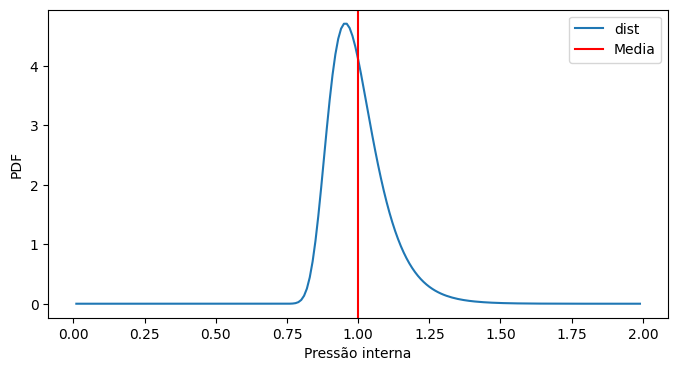

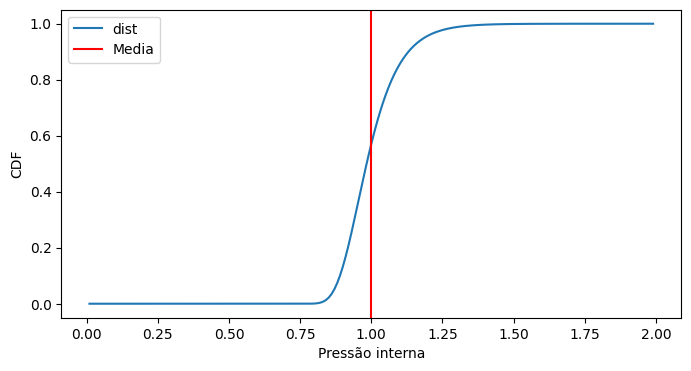

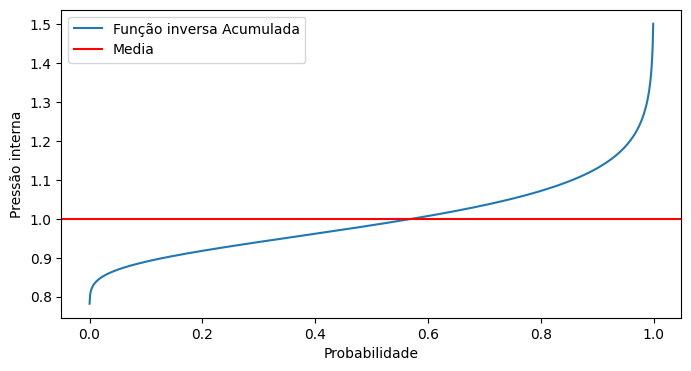

In [112]:
graph_pdf(x, pdf, mu4, 'PDF', 'Pressão interna')
graph_cdf(x, cdf, mu4, 'CDF', 'Pressão interna')
graph_icdf(x, icdf, mu4, 'Pressão interna', 'Probabilidade')

# U5 - Temperatura Interna: Normal

In [16]:
mu5, delta5 = 1.0, 0.1

sigma5 = sigma(mu5, delta5)

print(f'sigma = {sigma5:.3f}')

sigma = 0.100


In [17]:
f5 = partial(norm.pdf, loc=mu5, scale=sigma5)
F5 = partial(norm.cdf, loc=mu5, scale=sigma5)
IF5 = partial(norm.ppf, loc=mu5, scale=sigma5)

x = np.arange(0.01, mu5+10*sigma5, 0.01)
p = np.arange(0.0, 1.0, 0.001)

pdf = f5(x)
cdf = F5(x)
icdf = IF5(p)

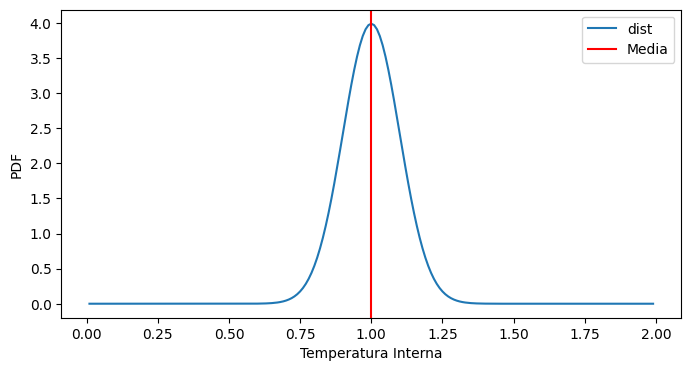

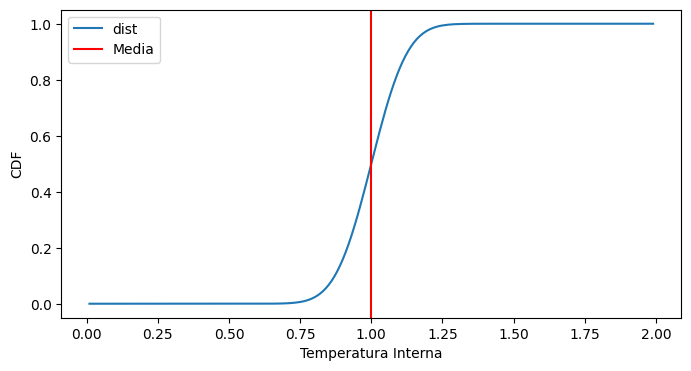

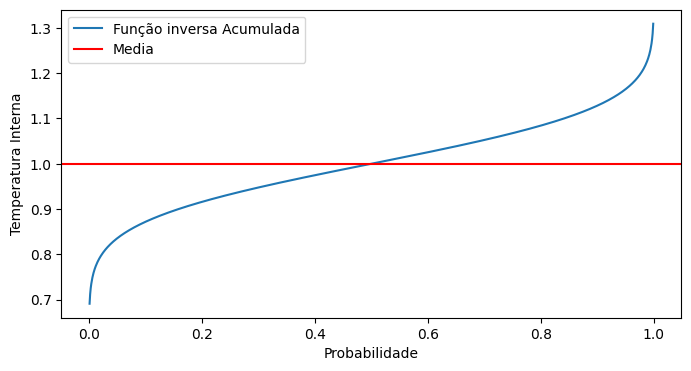

In [18]:
graph_pdf(x, pdf, mu5, 'PDF', 'Temperatura Interna')
graph_cdf(x, cdf, mu5, 'CDF', 'Temperatura Interna')
graph_icdf(x, icdf, mu5, 'Temperatura Interna', 'Probabilidade')

 # U6 - Ângulo de atrito interno: Lognormal

In [19]:
mu6, delta6 = 14.0, 0.1

sigma6, ksi6, lambda6 =  paramenters_lognormal(mu6, delta6)

print(f'sigma = {sigma6:.3f} ksi = {ksi6:.5f} lambda = {lambda6:.5f}')

sigma = 1.400 ksi = 0.09975 lambda = 2.63408


In [20]:
x = np.arange(0.01, mu6+10*sigma6, 0.01)
p = np.arange(0.0, 1.0, 0.001)

f6 = partial(lognorm.pdf, s=ksi6, scale=exp(lambda6))
F6 = partial(lognorm.cdf, s=ksi6, scale=exp(lambda6))
IF6 = partial(lognorm.ppf, s=ksi6, scale=exp(lambda6))

pdf = f6(x)
cdf = F6(x)
icdf = IF6(p)

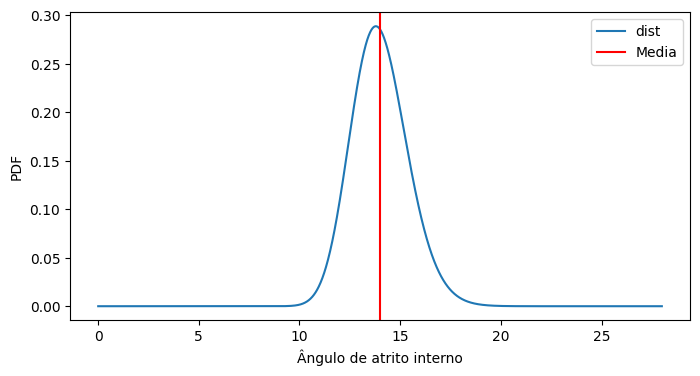

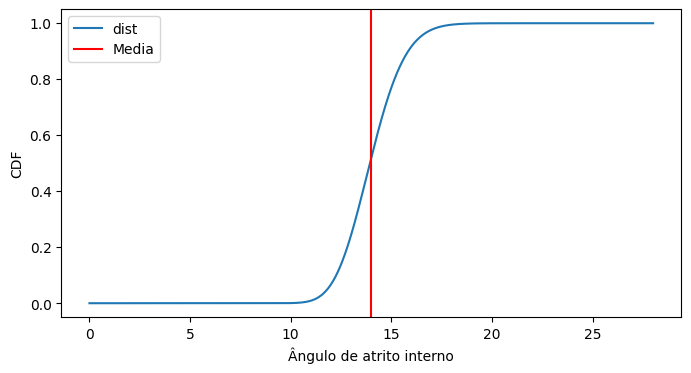

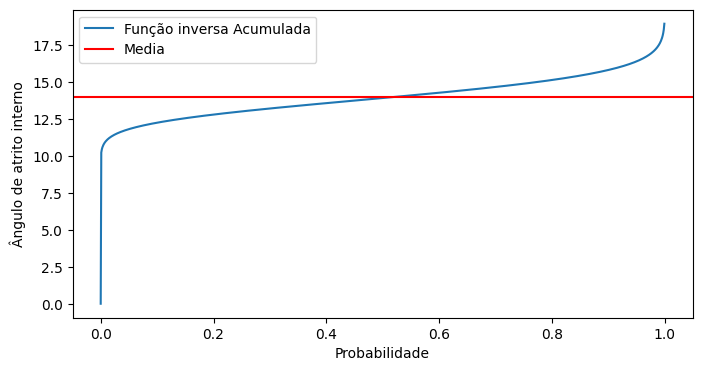

In [21]:
graph_pdf(x, pdf, mu6, 'PDF', 'Ângulo de atrito interno')
graph_cdf(x, cdf, mu6, 'CDF', 'Ângulo de atrito interno')
graph_icdf(x, icdf, mu6, 'Ângulo de atrito interno', 'Probabilidade')

# U7 - Coef. de Dilatação Térmica: Lognormal

In [22]:
mu7, delta7 = 1.0, 0.1

sigma7, ksi7, lambda7 =  paramenters_lognormal(mu7, delta7)

print(f'sigma = {sigma7:e} ksi = {ksi7:.5f} lambda = {lambda7:.5f}')

sigma = 1.000000e-01 ksi = 0.09975 lambda = -0.00498


In [23]:
x = np.arange(1e-9, mu7+10*sigma7, 0.01)
p = np.arange(0.0, 1.0, 0.001)

f7 = partial(lognorm.pdf, s=ksi7, scale=exp(lambda7))
F7 = partial(lognorm.cdf, s=ksi7, scale=exp(lambda7))
IF7 = partial(lognorm.ppf, s=ksi7, scale=exp(lambda7))

pdf = f7(x)
cdf = F7(x)
icdf = IF7(p)

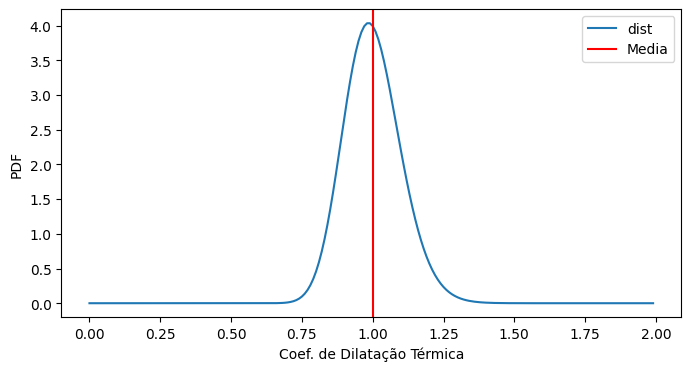

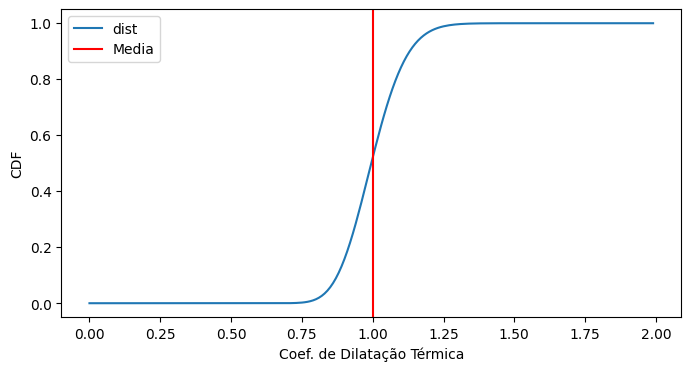

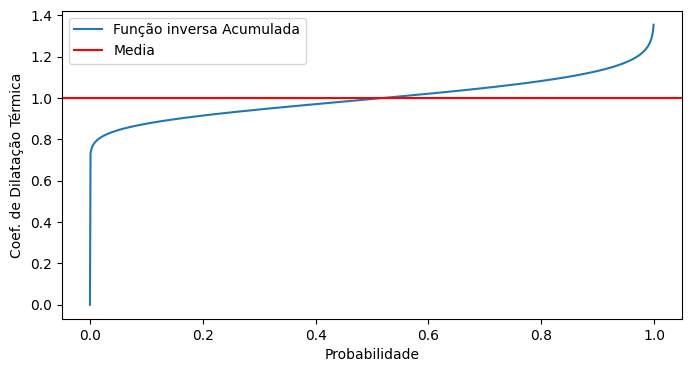

In [24]:
graph_pdf(x, pdf, mu7, 'PDF', 'Coef. de Dilatação Térmica')
graph_cdf(x, cdf, mu7, 'CDF', 'Coef. de Dilatação Térmica')
graph_icdf(x, icdf, mu7, 'Coef. de Dilatação Térmica', 'Probabilidade')

# FORMS LOOP

In [29]:
def print_array(name, array):
    print(name, end=' ')
    for a in array:
        print(f'{a:.3e}', end=' ')
    print()
        
def array_V(Ua, list_of_F):
    cholesky = np.ones_like(Ua) 
    
    vector = np.zeros_like(Ua)
    for i, (u, F) in enumerate(zip(Ua, list_of_F)):
        vector[i] = norm.ppf(F(u))    
        
    return cholesky * vector


def array_Y(Va):
    
    cholesky = np.ones_like(Va)      
        
    return cholesky * Va


def array_U(Vn, IFs):
    
    Y =  array_Y(Vn)
    
    vector = np.zeros_like(Y)
    
    for i, (y, IF) in enumerate(zip(Y, IFs)):
        cdf = norm.cdf(y)
        vector[i] = IF(cdf)

    return vector

def matrix_A(Ua, fs, Fs):
    
    A = np.zeros_like(Ua)
    
    for i, (U, f, F) in enumerate(zip(Ua, fs, Fs)):
        A[i]= f(U) / norm.pdf(norm.ppf(F(U)))  
    
    return A
    
    
def i_matrix_A(A):
    return 1.0/A

In [30]:
fs = (f1, f2, f3, f6, f7)
Fs = (F1, F2, F3, F6, F7)
IFs = (IF1, IF2, IF3, IF6, IF7)

## Iteração: 01

In [31]:
#  E, poisson, coehsion, friction_angle, thermal_expansion
Ua = np.array([1.19, 1.8, 1.817, 14.0, 1.0])
beta = 20
delta = 0.01
gamma = 0.3

# RCs
RC = 97.93e-2
novos_rcs =  np.array([97.92e-2, 97.93e-2, 97.95e-2, 97.94e-2, 97.91e-2])

Uaux = Ua*(1+delta)

Gi = RC - gamma
Gaux = novos_rcs - gamma

print('Gi', Gi)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Gi 0.6793
Uaux 1.202e+00 1.818e+00 1.835e+00 1.414e+01 1.010e+00 
Gaux 6.792e-01 6.793e-01 6.795e-01 6.794e-01 6.791e-01 


In [32]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)

A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', iA)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai}')
print(f'tol = {tol:e}')  
print_array('Un', Un) 

GradU -8.403e-03 0.000e+00 1.101e-02 7.143e-04 -2.000e-02 
Vi 4.988e-02 4.988e-02 0.000e+00 4.988e-02 4.988e-02 
A 8.424e+00 5.569e+00 5.504e+00 7.161e-01 1.002e+01 
iA 1.187e-01 1.796e-01 1.817e-01 1.397e+00 9.975e-02 
Grad_gi -9.975e-04 0.000e+00 2.000e-03 9.975e-04 -1.995e-03 
Modg = |Grad_gi| = 0.003157562115287466
Vn 6.797e+01 -0.000e+00 -1.363e+02 -6.797e+01 1.359e+02 
betai = |Vn| = 215.165839499781
tol = 9.070484e-01
Un inf 1.791e+00 -inf 0.000e+00 inf 


# Iteração 02:

In [220]:
Ua = np.array(Un)
beta = betai

# RCs
rc = 61.65e-2
novos_rcs =  np.array([61.28e-2, 0.2726, 0.2778, 0.2714, 0.2712])

Uaux = Ua*(1+delta)

Gi = rc - gamma
Gaux = novos_rcs - gamma

print_array('Ua', Ua)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Ua 2.686e+00 1.791e+00 3.230e-01 6.134e+00 2.257e+00 
Uaux 2.712e+00 1.809e+00 3.263e-01 6.196e+00 2.279e+00 
Gaux -3.240e-02 -2.740e-02 -2.220e-02 -2.860e-02 -2.880e-02 


In [221]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)

A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', A)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai}')
print(f'tol = {tol:e}') 
print_array('Un', Un) 

GradU -1.341e-01 7.817e-02 2.043e+00 3.260e-03 0.000e+00 
Vi 8.210e+00 0.000e+00 -8.222e+00 -8.222e+00 8.210e+00 
A 3.733e+00 5.597e+00 5.504e+00 1.634e+00 4.442e+00 
iA 3.733e+00 5.597e+00 5.504e+00 1.634e+00 4.442e+00 
Grad_gi -3.591e-02 1.397e-02 3.712e-01 1.995e-03 0.000e+00 
Modg = |Grad_gi| = 0.37322034501304
Vn 8.597e-01 -3.343e-01 -8.887e+00 -4.776e-02 -0.000e+00 
betai = |Vn| = 8.934720170842587
tol = 2.308199e+01
Un 1.290e+00 1.732e+00 2.023e-01 1.386e+01 9.950e-01 


# Iteração 03:

In [222]:
Ua = np.array(Un)
beta = betai

# RCs
rc = 0.3007
novos_rcs =  np.array([0.2971, 0.3021, 0.3074, 0.3009, 0.3007])

Uaux = Ua*(1+delta)

Gi = rc - gamma
Gaux = novos_rcs - gamma

print_array('Ua', Ua)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Ua 1.290e+00 1.732e+00 2.023e-01 1.386e+01 9.950e-01 
Uaux 1.303e+00 1.750e+00 2.043e-01 1.400e+01 1.005e+00 
Gaux -2.900e-03 2.100e-03 7.400e-03 9.000e-04 7.000e-04 


In [223]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)

A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', A)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai}')
print(f'tol = {tol:e}') 
print_array('Un', Un) 

GradU -2.790e-01 8.082e-02 3.313e+00 1.443e-03 0.000e+00 
Vi 8.597e-01 -3.343e-01 -8.887e+00 -4.776e-02 0.000e+00 
A 7.771e+00 5.787e+00 5.504e+00 7.231e-01 1.007e+01 
iA 7.771e+00 5.787e+00 5.504e+00 7.231e-01 1.007e+01 
Grad_gi -3.591e-02 1.397e-02 6.019e-01 1.995e-03 0.000e+00 
Modg = |Grad_gi| = 0.6031314504879134
Vn 5.316e-01 -2.067e-01 -8.911e+00 -2.953e-02 -0.000e+00 
betai = |Vn| = 8.928894631261699
tol = 6.524368e-04
Un 1.249e+00 1.755e+00 1.979e-01 1.389e+01 9.950e-01 


# Iteração 04:

In [224]:
Ua = np.array(Un)
beta = betai

# RCs
rc = 0.3001
novos_rcs =  np.array([0.2966, 0.3015, 0.3066, 0.3003, 0.3001])

Uaux = Ua*(1+delta)

Gi = rc - gamma
Gaux = novos_rcs - gamma

print_array('Ua', Ua)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Ua 1.249e+00 1.755e+00 1.979e-01 1.389e+01 9.950e-01 
Uaux 1.261e+00 1.772e+00 1.999e-01 1.403e+01 1.005e+00 
Gaux -3.400e-03 1.500e-03 6.600e-03 3.000e-04 1.000e-04 


In [225]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)

A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', A)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai}')
print(f'tol = {tol:e}') 
print_array('Un', Un) 

GradU -2.803e-01 7.979e-02 3.284e+00 1.440e-03 0.000e+00 
Vi 5.316e-01 -2.067e-01 -8.911e+00 -2.953e-02 0.000e+00 
A 8.029e+00 5.714e+00 5.504e+00 7.218e-01 1.007e+01 
iA 8.029e+00 5.714e+00 5.504e+00 7.218e-01 1.007e+01 
Grad_gi -3.491e-02 1.397e-02 5.967e-01 1.995e-03 0.000e+00 
Modg = |Grad_gi| = 0.5978495665685988
Vn 5.214e-01 -2.086e-01 -8.911e+00 -2.980e-02 -0.000e+00 
betai = |Vn| = 8.92905586202203
tol = 1.805687e-05
Un 1.247e+00 1.754e+00 1.978e-01 1.389e+01 9.950e-01 
